# Notebook 2:  Clustering con Modelo de Mezclas de Normales (GMM)

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio considerando el uso de un función que permita medir la calidad del agrupamiento cuando se conocen los grupos de cada observación.

In [2]:
#install.packages("mclust")
#install.packages("cluster")
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")
summary(datos)

Package 'mclust' version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 4 components: 

 log-likelihood   n df       BIC       ICL
       177.3167 210 93 -142.6475 -157.7975

Clustering table:
 1  2  3  4 
67 75 23 45 

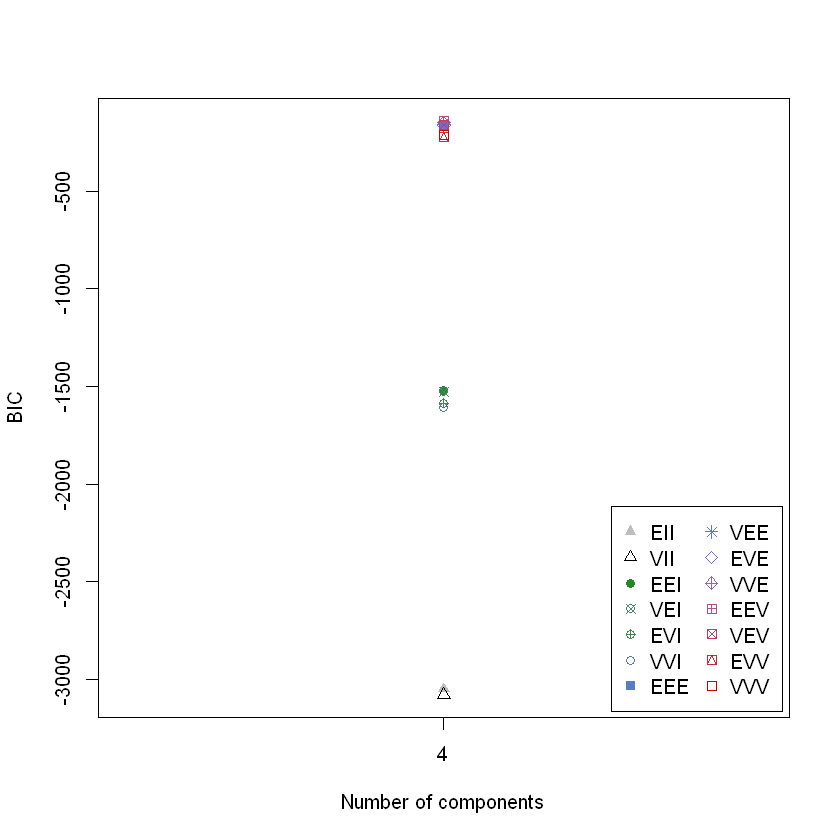

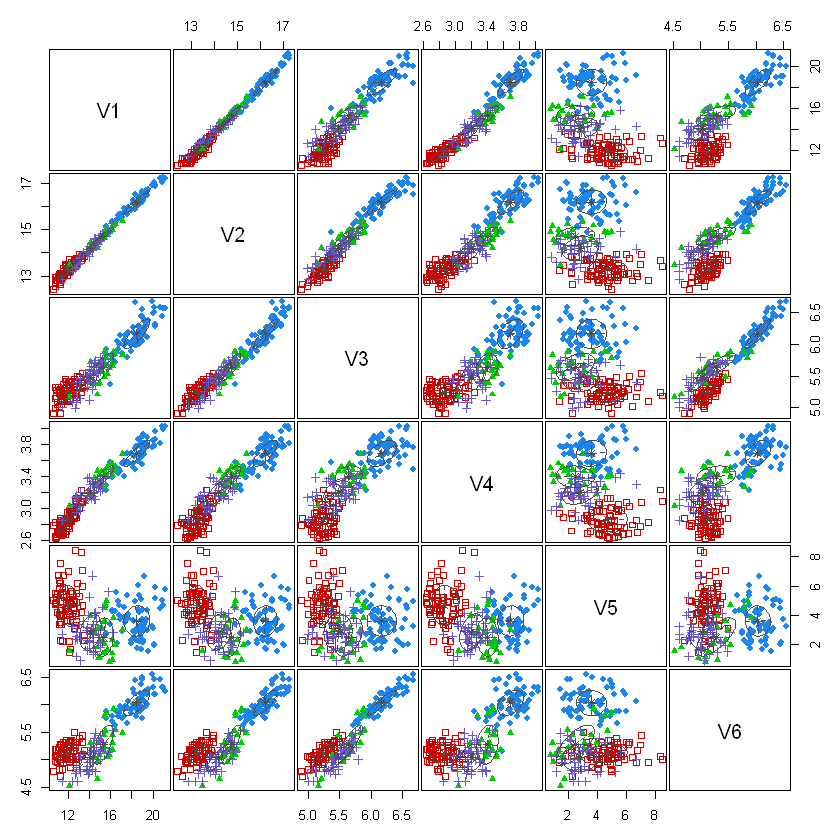

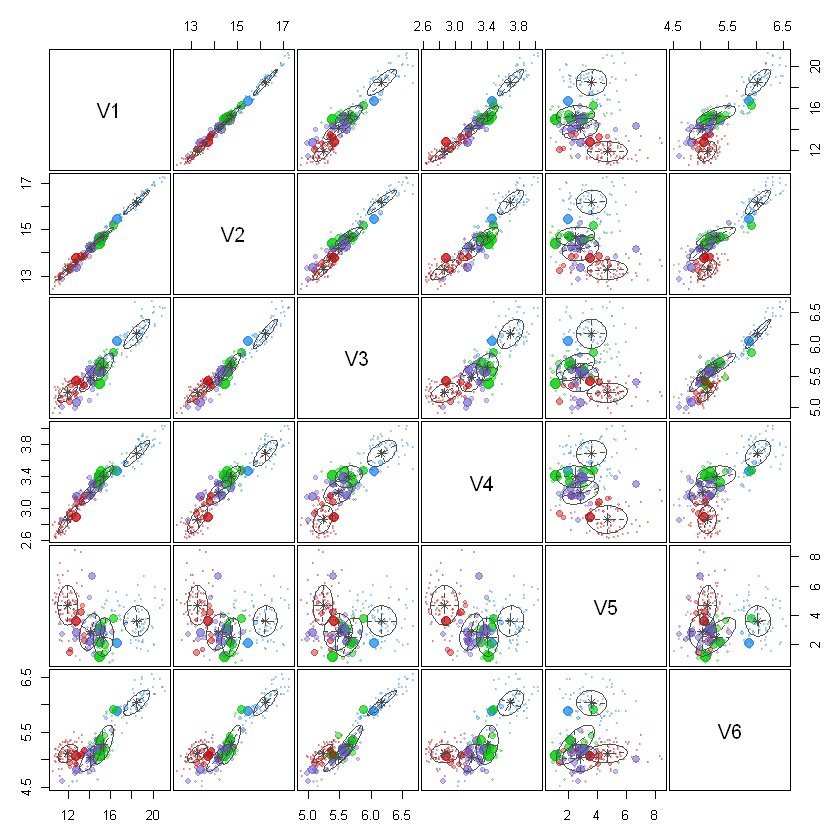

'Mclust' model object: (EEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

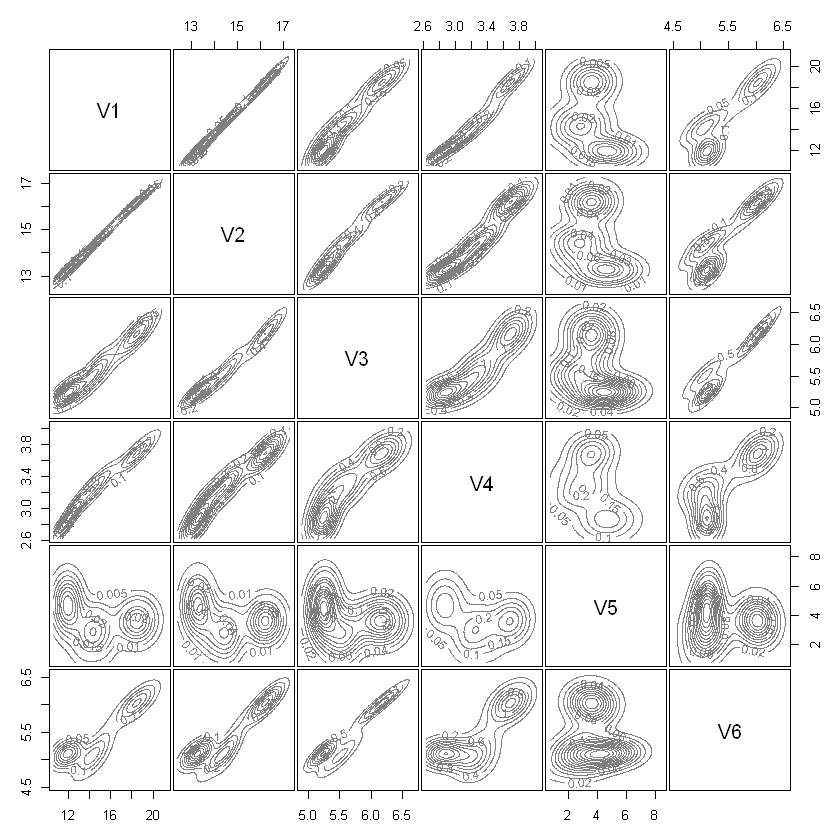

In [6]:
clus <-Mclust(datos, G = 4)
summary(clus)
plot(clus)
clus




In [4]:
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers


V1,V2,V3,V4,V5,V6
18.46213,16.19470,6.167813,3.690301,3.596481,6.033091
11.93175,13.27016,5.234781,2.863010,4.682985,5.113286
15.29414,14.71759,5.641832,3.398164,2.495003,5.274619
14.07522,14.18237,5.472207,3.200684,2.842341,5.035122


**Ejercicio 1:**

a) Explique como funciona el método Mclust, describa los principales parámetros de entrada y salida.
- Parametros de entrada: datos que es un matriz de variables y observaciones y G (cluster a utilizar) en este caso se condiciona a que sean 4 (G=4), si no se agrega G, el método selecciona 2  cluster.
- Parametros de salida: 
    - Dice que se ha ajustado a un modelo de mezcla gaussiana usando el algoritmo EM (Expectation - Maximation)
    - A legido Mclust EVV con 4 componentes Cluster
    - n = 210,  muestra el numero total de observaciones 
    

b) Interprete y comente los resultados obtenidos.
- El modelo asigno los 210 observaciones entre los 4 cluster de la forma 
Cluster 1 -> 67 observaciones
Cluster 2 -> 75 observaciones
Cluster 3 -> 23 observaciones
Cluster 4 -> 45 observaciones

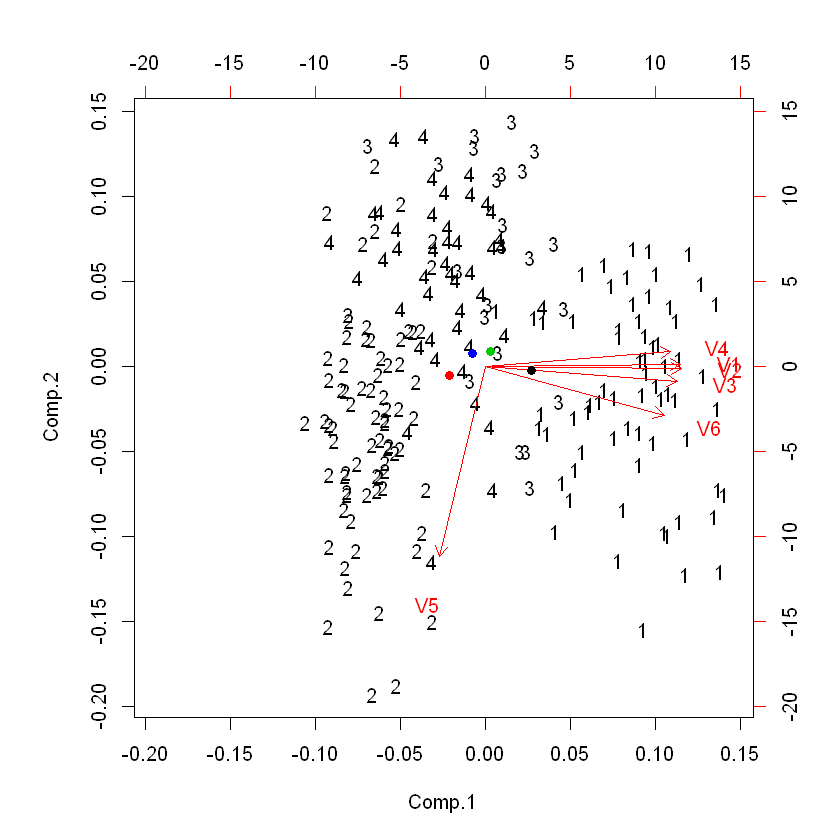

In [7]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log L(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

**Ejercicio 2:**

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

**En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico**

In [7]:
help(hclust)

**Ejercicio 3:** 

a) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD) y resuma brevemente en que consisten.

Considere el archivo "semillas.txt" que contiene una séptima variable con la clasificación de las semillas en tres variedades: 
- 1: Kama
- 2: Rosa
- 3: Canadian

b) Calcule alguna de las medidas de calidad estudiadas para los agrupamientos obtenidos con  KMeans (tarea anterior) y GMM, considerando la etiqueta en V7 para sus cálculos. Compare y discuta sus resultados.

In [4]:
datos1 <-read.table("..//data//semillas.txt",dec=".")
summary(datos1)

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6              V7   
 Min.   :0.765   Min.   :4.519   Min.   :1  
 1st Qu.:2.562   1st Qu.:5.045   1st Qu.:1  
 Median :3.599   Median :5.223   Median :2  
 Mean   :3.700   Mean   :5.408   Mean   :2  
 3rd Qu.:4.769   3rd Qu.:5.877   3rd Qu.:3  
 Max.   :8.456   Max.   :6.550   Max.   :3  

In [5]:
tab <-table(datos1$V7, cl)
tab


   cl
     1  2  3  4
  1  1  7 19 43
  2 66  0  4  0
  3  0 68  0  2

In [6]:
purity <- function(clusters, clases) {
  sum(apply(table(clases, clusters), 2, max)) / length(clusters)
}

